<a href="https://colab.research.google.com/github/mdkamrulhasan/data_mining_kdd/blob/main/notebooks/Classification_Insurance_mixed_data_types_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What will we cover today ?


1.   Feature encoding (One-hot)
2.   Feature Normalization (MinMaxScalar)



In [32]:
import numpy as np
import pandas as pd
# Models (Sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
# visualization
import plotly.express as px

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from sklearn.model_selection import train_test_split

[Data description](https://www.kaggle.com/datasets/mirichoi0218/insurance/)

In [3]:
# Load the  dataset
data_url = 'https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/main/data/medical-cost/insurance.csv'
df = pd.read_csv(data_url)
df.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [5]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [6]:
df.age.max(), df.region.unique()

(64, array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object))

Features and labels

## Smoker/non-smoker Prediction

In [9]:
# Specify your input features and label columns
feature_columns = ['age', 'sex', 'bmi', 'children', 'region', 'charges']
label_column = 'smoker'

In [10]:
features_df = df[feature_columns]
y = df[label_column]

In [11]:
features_df.head(2)

,age,sex,bmi,children,region,charges
0,19,female,27.90,0,southwest,16884.9240
1,18,male,33.77,1,southeast,1725.5523


# Checking data types

In [13]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   region    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


# Seperating numeric and categorical features

In [14]:
features_numeric = []
features_categorical = []
for colx in features_df.columns:
  if features_df[colx].dtype == 'object':
    #print(colx, df[colx].nunique())
    features_categorical.append(colx)
  else:
    features_numeric.append(colx)
print('numeric features:', features_numeric)
print('categorical features:', features_categorical)

numeric features: ['age', 'bmi', 'children', 'charges']
categorical features: ['sex', 'region']


## NULL value imputations

In [22]:
# filling missing numeric values with the mean
features_df[features_numeric].fillna(features_df[features_numeric].mean(), inplace=True)
# filling missing categorical values with the mode
features_df[features_categorical].fillna(features_df[features_categorical].mode().iloc[0], inplace=True)

<ipython-input-22-7e6241f19807>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# One-hot-encoding

In [24]:
# checking for the first categorical feature (sex)
f_categorical = features_categorical[0]
one_hot_transform = pd.get_dummies(
    features_df[f_categorical], prefix=f_categorical+'_')
one_hot_transform.head(3)

,sex__female,sex__male
0,True,False
1,False,True
2,False,True


# Lets do the encoding for all categorical features

In [25]:
one_hot_dataframes = []
for featx in features_categorical:
  one_hot_dataframes.append(
      pd.get_dummies(features_df[featx], prefix=featx+'_')
  )

# Concatinating all dataframes

In [26]:
df_all_numeric = pd.concat([features_df[features_numeric]]
                           + one_hot_dataframes, axis=1)
df_all_numeric.head()

,age,bmi,children,charges,sex__female,sex__male,region__northeast,region__northwest,region__southeast,region__southwest
0,19,27.900,0,16884.92400,True,False,False,False,False,True
1,18,33.770,1,1725.55230,False,True,False,False,True,False
2,28,33.000,3,4449.46200,False,True,False,False,True,False
3,33,22.705,0,21984.47061,False,True,False,True,False,False
4,32,28.880,0,3866.85520,False,True,False,True,False,False


In [27]:
# checking original and the converted dataframes
features_df.shape, df_all_numeric.shape

((1338, 6), (1338, 10))

In [28]:
# getting the feature matrix (from pandas dataframe)
X = df_all_numeric.to_numpy()
# checking the feature and lable matrix/vector shapes
X.shape, y.shape

((1338, 10), (1338,))

# Data Splitting

In [29]:
TEST_PROP = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_PROP, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1070, 10), (1070,), (268, 10), (268,))

# Training and reporting

In [33]:
# Create a logistic regression object
clf = LogisticRegression()
# Train the model using the training sets
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [40]:
y_pred = clf.predict(X_test)
# Accuracy, Precision, Recall, F1 Score
print("precision: %.5f" % accuracy_score(y_test, y_pred))

precision: 0.94776


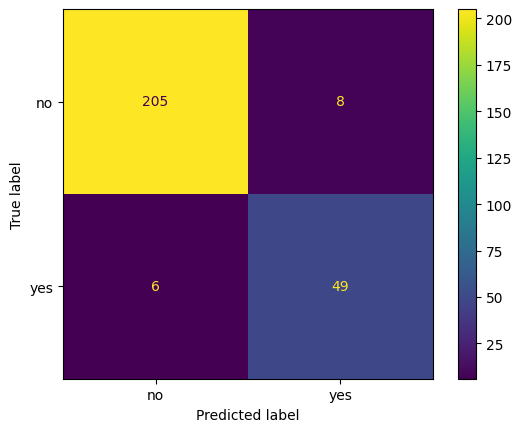

In [35]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()